In [7]:
import os

import numpy as np
import scipy as sp
from scipy import misc, stats
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
#import plotly.plotly as py
import seaborn as sns
from pandas import DataFrame, Series
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [18]:
MAIN_TAG = 'portrait'
DIRNAME_TAGS = 'D:/Docs/MIRFlickr25k_tags/tags'
DIRNAME_IMAGES = 'D:/Docs/mirflickr/'

COLOR = {'red': 0,
         'green': 1,
         'blue': 2}

In [9]:
from os import listdir
from matplotlib import image
import random
# load all images in a directory
np.random.RandomState(2)
random_indexes = np.random.choice(range(25000), 250)
loaded_images = list()
image_names = list()
for i in range(250):
	# load image
	randName = random_indexes[i]
	image_names.append(randName)
	filename = 'im' + str(randName) + '.jpg'
	img_data = image.imread('D:/Docs/mirflickr/' + filename)
	# store loaded image
	loaded_images.append(img_data)
	print('> loaded %s %s' % (filename, img_data.shape))

> loaded im13475.jpg (333, 500, 3)
> loaded im13839.jpg (333, 500, 3)
> loaded im5719.jpg (500, 334, 3)
> loaded im18956.jpg (333, 500, 3)
> loaded im12662.jpg (333, 500, 3)
> loaded im23681.jpg (332, 500, 3)
> loaded im12456.jpg (333, 500, 3)
> loaded im4558.jpg (333, 500, 3)
> loaded im129.jpg (281, 500, 3)
> loaded im19227.jpg (490, 368, 3)
> loaded im17640.jpg (359, 500, 3)
> loaded im17948.jpg (338, 500, 3)
> loaded im9184.jpg (333, 500, 3)
> loaded im12262.jpg (348, 500, 3)
> loaded im15317.jpg (375, 500, 3)
> loaded im20215.jpg (500, 438, 3)
> loaded im16969.jpg (375, 500, 3)
> loaded im288.jpg (298, 500, 3)
> loaded im6624.jpg (332, 500, 3)
> loaded im12607.jpg (318, 500, 3)
> loaded im6078.jpg (375, 500, 3)
> loaded im11862.jpg (500, 337, 3)
> loaded im6377.jpg (375, 500, 3)
> loaded im4615.jpg (375, 500, 3)
> loaded im222.jpg (200, 500, 3)
> loaded im17664.jpg (333, 500, 3)
> loaded im10140.jpg (500, 333, 3)
> loaded im23728.jpg (500, 333, 3)
> loaded im14684.jpg (500, 346, 3

> loaded im24248.jpg (500, 333, 3)
> loaded im9153.jpg (333, 500, 3)
> loaded im16662.jpg (500, 500, 3)
> loaded im15777.jpg (500, 333, 3)
> loaded im22164.jpg (375, 500, 3)
> loaded im262.jpg (375, 500, 3)
> loaded im3872.jpg (333, 500, 3)
> loaded im11709.jpg (333, 500, 3)
> loaded im24495.jpg (500, 375, 3)
> loaded im19815.jpg (333, 500, 3)
> loaded im24300.jpg (379, 500, 3)
> loaded im21424.jpg (375, 500, 3)
> loaded im6187.jpg (331, 500, 3)
> loaded im21833.jpg (333, 500, 3)


In [10]:
values = np.zeros((3, 256))
index = 0

In [11]:
for image in loaded_images:
	for i in range(image.shape[0]):
		for j in range(image.shape[1]):
			values[0][image[i][j][0]] += 1
			values[1][image[i][j][1]] += 1
			values[2][image[i][j][2]] += 1
	index += 1
	if (index % 10) == 0:
		print('> processed %i images' % (index))

> processed 10 images
> processed 20 images
> processed 30 images
> processed 40 images
> processed 50 images
> processed 60 images
> processed 70 images
> processed 80 images
> processed 90 images
> processed 100 images
> processed 110 images
> processed 120 images
> processed 130 images
> processed 140 images
> processed 150 images
> processed 160 images
> processed 170 images
> processed 180 images
> processed 190 images
> processed 200 images
> processed 210 images
> processed 220 images
> processed 230 images
> processed 240 images
> processed 250 images


In [13]:
RED = 0
GREEN = 1
BLUE = 2

sum_val = sum(values[RED])
M_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    M_red += p * index
D_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    D_red += p * ((index - M_red) ** 2)
print("Red: expected value (math. ochikuvanya) : {0:.2f}, dispersion : {1:.2f}"\
.format(M_red, D_red))

sum_val = sum(values[GREEN])
M_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    M_green += p * index
D_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    D_green += p * ((index - M_green) ** 2)
print("Green: expected value (math. ochikuvanya) : {0:.2f}, dispersion : {1:.2f}"\
.format(M_green, D_green))
sum_val = sum(values[BLUE])
M_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    M_blue += p * index
D_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    D_blue += p * ((index - M_blue) ** 2)
print("Blue: expected value (math. ochikuvanya) : {0:.2f}, dispersion : {1:.2f}"\
.format(M_blue, D_blue)) 

Red: expected value (math. ochikuvanya) : 113.22, dispersion : 6224.45
Green: expected value (math. ochikuvanya) : 104.32, dispersion : 5679.20
Blue: expected value (math. ochikuvanya) : 91.91, dispersion : 5970.32


In [14]:
def E_operator(arr_values, M, power):
    sum_val = sum(arr_values)
    ans = 0
    for index in range(len(arr_values)):
        p = (arr_values[index] / sum_val)
        ans += p * ((index - M) ** power)
    return ans

In [15]:
Asym_red = E_operator(values[RED], M_red, 3) / (D_red ** (3 / 2))
Asym_green = E_operator(values[GREEN], M_green, 3) / (D_green ** (3 / 2))
Asym_blue = E_operator(values[BLUE], M_blue, 3) / (D_blue ** (3 / 2))

Ekscess_red = E_operator(values[RED], M_red, 4) / (D_red ** 2) - 3
Ekscess_green = E_operator(values[GREEN], M_green, 4) / (D_green ** 2) - 3
Ekscess_blue = E_operator(values[BLUE], M_blue, 4) / (D_blue ** 2) - 3
print('Red: asymmetry - {0:.3f}, ekscess - {1:.3f}'\
.format(Asym_red, Ekscess_red))
print('Green: asymmetry - {0:.3f}, ekscess - {1:.3f}'\
.format(Asym_green, Ekscess_green))
print('Blue: asymmetry - {0:.3f}, ekscess - {1:.3f}'\
.format(Asym_blue, Ekscess_blue))

Red: asymmetry - 0.167, ekscess - -1.206
Green: asymmetry - 0.301, ekscess - -1.037
Blue: asymmetry - 0.553, ekscess - -0.888


In [16]:
len(image_names)

250

In [19]:
import codecs

Y = pd.Series()
for name in image_names:
    with codecs.open(os.path.join(DIRNAME_TAGS, 'tags%d.txt' % (name,)), "r", "utf_8_sig") as file:
        set_tags = set(tag.strip() for tag in file.readlines())
        #print('tags%d.txt' % (name,), '  ',set_tags)
        Y.at[name] = int(MAIN_TAG in set_tags)
Y = pd.DataFrame(Y, columns=['target'])

In [20]:
Y['target'].value_counts()

0    242
1      6
Name: target, dtype: int64

In [21]:
Y.head()

,target
13475,1
13839,0
5719,0
18956,0
12662,0


In [22]:
data_static = DataFrame()
num = 0
d = []
for image_name in image_names:
    image = np.array(Image.open(os.path.join(DIRNAME_IMAGES, 'im%d.jpg' % (image_name))))
    data = []
    for name, num in COLOR.items():
        a = image[:, :, num].ravel()
        data.extend([np.mean(a), np.var(a), sp.stats.skew(a), sp.stats.kurtosis(a)])
    d.append([image_name, *data])
    

data_static = pd.DataFrame.from_records(d)
data_static = data_static.rename(columns={0: 'name'}).set_index('name')

In [23]:
data_static.head()

,1,2,3,4,5,6,7,8,9,10,11,12
name,,,,,,,,,,,,
13475,63.685381,6589.074745,1.116152,-0.090210,75.309940,6794.698238,0.843058,-0.624699,50.284925,4791.425076,1.695302,2.079547
13839,117.006607,2499.067752,0.438894,-0.613230,112.151748,2657.945201,0.474138,-0.607519,107.248715,2780.434976,0.581609,-0.458183
5719,157.287234,6036.416084,-0.577687,-1.087543,148.432449,5964.418383,-0.382964,-1.201155,144.322192,5445.728276,-0.275789,-1.151270
18956,158.541069,4018.761863,-0.843609,-0.272878,99.329838,3874.509970,0.238434,-1.155655,68.137441,2797.745807,0.819131,-0.366557
12662,79.363387,5726.956250,0.742645,-0.855855,76.902444,5481.149324,0.755571,-0.840318,69.486697,4772.650748,0.926135,-0.397773


In [24]:
data_static.shape

(250, 12)

In [29]:
import itertools

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [30]:
N = 12
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j], 3),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

In [31]:
X = data_static.copy()

df = Y.join(X, how='inner')
df = df.drop_duplicates()

y = df['target']
X = df.drop('target', axis=1)

Normalized confusion matrix
[[0.9951624 0.0048376]
 [1.        0.       ]]


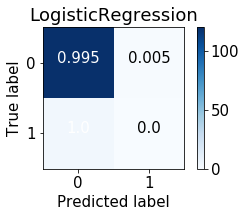

Normalized confusion matrix
[[0.08121129 0.91878871]
 [0.17142857 0.82857143]]


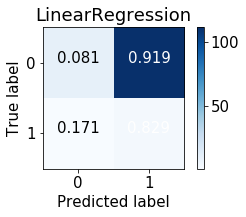

Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


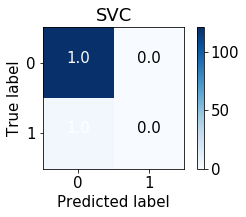

In [32]:
for c in (LogisticRegression, LinearRegression, SVC):
    cls = c()
    cnf_matrix = []
    for i in range(N):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
        cls.fit(X_train, y_train)
        y_predict = cls.predict(X_test)
        cnf_matrix.append(confusion_matrix(y_test, y_predict.astype(bool).astype(int)))
    cnf_matrix = np.mean(np.array(cnf_matrix), axis=0)
    plt.figure(figsize=(4, 3))
    plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                          title=c.__name__)
    plt.savefig("static_" + c.__name__ + ".png")
    plt.show()
    #print(cnf_matrix)

Normalized confusion matrix
[[0.92366412 0.07633588]
 [0.56521739 0.43478261]]


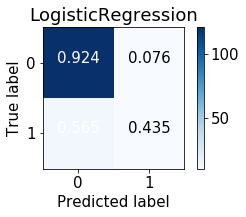

[[121  10]
 [ 13  10]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


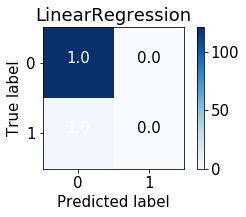

[[120.91666667   0.        ]
 [  3.08333333   0.        ]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


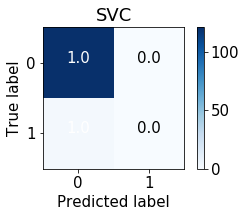

[[121.25   0.  ]
 [  2.75   0.  ]]


In [33]:
for c in (LogisticRegression, LinearRegression, SVC):
    cls = LinearRegression(n_jobs=-1)
    cnf_matrix = []
    for i in range(N):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
        cls.fit(X_train, y_train)
        y_predict = cls.predict(X_test).astype(int)
        #print(y_predict)
   
        cnf_matrix.append(confusion_matrix(y_test, y_predict.astype(bool).astype(int))) # .astype(int)
    #print(confusion_matrix(y_test, y_predict.astype(int)))
    cnf_matrix = np.mean(np.array(cnf_matrix), axis=0)
    plt.figure(figsize=(4, 3))
    plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                              title=c.__name__)
    plt.savefig("spam" + c.__name__ + ".png")
    plt.show()
    print(cnf_matrix)

Normalized confusion matrix
[[0.99173554 0.00826446]
 [1.         0.        ]]


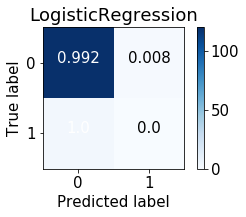

Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


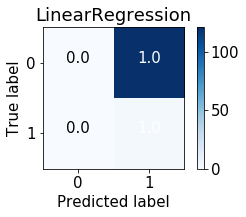

ValueError: The number of classes has to be greater than one; got 1 class

In [34]:
for c in (LogisticRegression, LinearRegression, SVC):
    cnf_matrix = []
    for i in range(N):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
        cls = c()
        cls.fit(X_train, y_train)
        y_predict = cls.predict(X_test)
        cnf_matrix.append(confusion_matrix(y_test, y_predict.astype(bool).astype(int)))
    #print(confusion_matrix(y_test, y_predict.astype(int)))
    cnf_matrix = np.mean(np.array(cnf_matrix), axis=0)
    plt.figure(figsize=(4, 3))
    plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                              title=c.__name__)
    plt.savefig("ccpev_" + c.__name__ + ".png")
    plt.show()
    #print(cnf_matrix)